<a href="https://colab.research.google.com/github/sagniksantra/Dicee/blob/main/Deep%20Learning/week3/DL_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Sagnik Santra
Reg- 210968024
5th Sem Sec A Batch A1
'''

'\nSagnik Santra\nReg- 210968024\n5th Sem Sec A Batch A1\n'

In [ ]:
#importing necessary libraries
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#loading the fashion mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#Number of classes
y_train = np.array(y_train)
print("Number of Classes: ",len(np.unique(y_train)))
print("Classes: ", np.unique(y_train))

Number of Classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
#Dimension of images
x_train[0].shape

(28, 28)

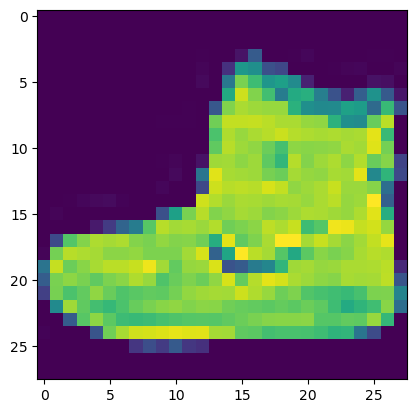

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.show()

In [ ]:
#Min-Max Normalization
x_train = np.array(x_train)
x_train = x_train/255

In [ ]:
#FCNN
fcnn = tf.keras.Sequential()
fcnn.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
fcnn.add(tf.keras.layers.Dense(128, activation = 'relu')
fcnn.add(tf.keras.layers.Dense(64, activation = 'relu')
fcnn.add(tf.keras.layers.Dense(32, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.1)))
fcnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
fcnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
fcnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = fcnn.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 2.5645 - accuracy: 0.5888 - val_loss: 1.5094 - val_accuracy: 0.6241
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 1.4036 - accuracy: 0.6733 - val_loss: 1.3423 - val_accuracy: 0.6837
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2947 - accuracy: 0.6971 - val_loss: 1.2414 - val_accuracy: 0.7203
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2334 - accuracy: 0.7063 - val_loss: 1.2112 - val_accuracy: 0.6900
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 1.1888 - accuracy: 0.7111 - val_loss: 1.1854 - val_accuracy: 0.7104
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1613 - accuracy: 0.7165 - val_loss: 1.1228 - val_accuracy: 0.7283
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1382 - accuracy: 0.7171 - val_loss: 1.1334 - val_accuracy:

In [ ]:
loss, accuracy = fcnn.evaluate(x_test/255, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.0806 - accuracy: 0.7071
Test Loss: 1.08060622215271
Test Accuracy: 0.707099974155426


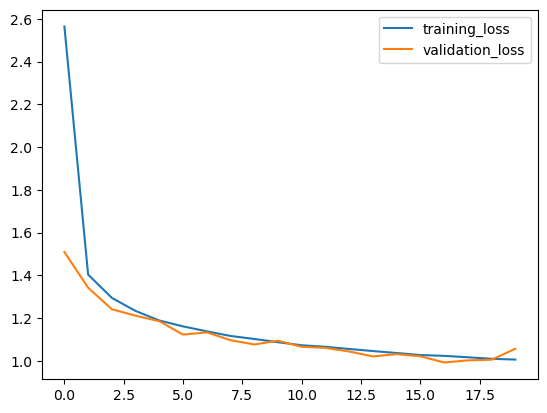

In [ ]:
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

In [ ]:
#Overfitting was avoided by using regularization

In [ ]:
cnn1 = tf.keras.Sequential()
cnn1.add(tf.keras.layers.Conv2D(32, (5, 5), strides = (1, 1), padding = "valid" , activation ='relu', input_shape = (28, 28, 1)))
cnn1.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(100, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.1)))
cnn1.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 4608)              0         
                                                                 
 dense_20 (Dense)            (None, 100)               460900    
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
________________________________________________

In [ ]:
history = cnn1.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

Epoch 1/50
1500/1500 [==============================] - 6s 3ms/step - loss: 1.1442 - accuracy: 0.7267 - val_loss: 0.8938 - val_accuracy: 0.7495
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8112 - accuracy: 0.7732 - val_loss: 0.8007 - val_accuracy: 0.7744
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7423 - accuracy: 0.7940 - val_loss: 0.7061 - val_accuracy: 0.8012
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7009 - accuracy: 0.8114 - val_loss: 0.6912 - val_accuracy: 0.8192
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6698 - accuracy: 0.8231 - val_loss: 0.6678 - val_accuracy: 0.8112
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6372 - accuracy: 0.8345 - val_loss: 0.6418 - val_accuracy: 0.8287
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6192 - accuracy: 0.8380 - val_loss: 0.6555 - val_accuracy:

In [ ]:
loss, accuracy = cnn1.evaluate(x_test/255, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.5648 - accuracy: 0.8475
Test Loss: 0.5648271441459656
Test Accuracy: 0.8475000262260437


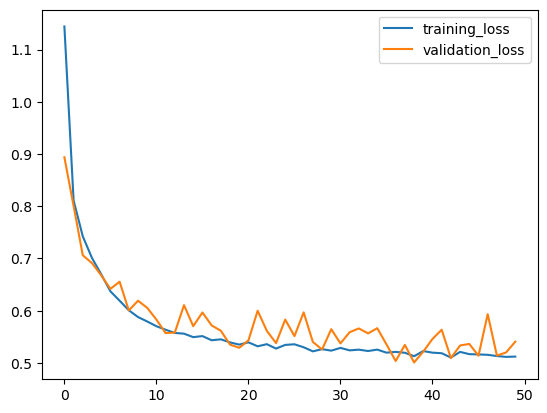

In [ ]:
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

In [ ]:
cnn2 = tf.keras.Sequential()
cnn2.add(tf.keras.layers.Conv2D(32, (3, 3), strides = (1, 1), padding = "valid" , activation ='relu', input_shape = (28, 28, 1)))
# cnn2.add(tf.keras.layers.Dropout(0.2))
cnn2.add(tf.keras.layers.Conv2D(16, (3, 3), strides = (1, 1), padding = "valid" , activation ='relu'))
cnn2.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.Dense(100, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.1)))
cnn2.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 2304)              0         
                                                                 
 dense_18 (Dense)            (None, 100)               230500    
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                      

In [ ]:
history = cnn2.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 1.0631 - accuracy: 0.7608 - val_loss: 0.7843 - val_accuracy: 0.7793
Epoch 2/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6802 - accuracy: 0.8144 - val_loss: 0.6499 - val_accuracy: 0.8211
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6202 - accuracy: 0.8314 - val_loss: 0.6167 - val_accuracy: 0.8248
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5913 - accuracy: 0.8388 - val_loss: 0.6345 - val_accuracy: 0.8213
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5675 - accuracy: 0.8479 - val_loss: 0.5726 - val_accuracy: 0.8371
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5466 - accuracy: 0.8543 - val_loss: 0.5744 - val_accuracy: 0.8469
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5317 - accuracy: 0.8589 - val_loss: 0.5007 - val_accuracy:

In [ ]:
loss, accuracy = cnn2.evaluate(x_test/255, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4655 - accuracy: 0.8760
Test Loss: 0.46547144651412964
Test Accuracy: 0.8759999871253967


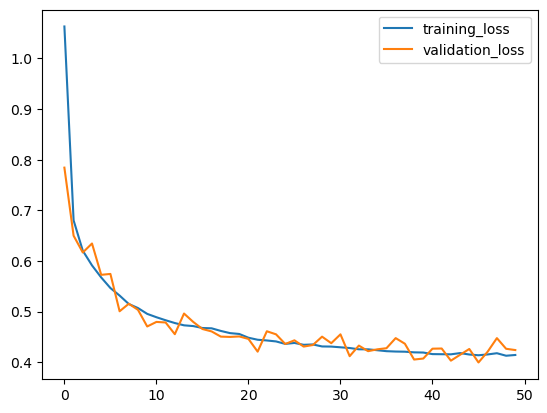

In [ ]:
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

In [ ]:
#The performance of cnn2 was slightly better than cnn1, due to the added convolutional layer which allowed for more
#refined features to be learned

In [ ]:
#The performance of CNN was much better than FCNN. This proves the efficiency of CNN for image datasets.
#The number of parameter of CNN was 462,742 while that of FCNN was 111,146. That is a big diffirence(more than 4 times)
#and shows how much more computationally expensive CNN is than FCNN. Thus a CNN takes longer to train than FCNN.